In [14]:
import torch
import torchvision
from torch import nn
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import MNIST
from matplotlib import pyplot as plt

In [15]:
def to_img(x):
    x = 0.5 * (x + 1)
    x = x.view(x.size(0), 28, 28)
    return x

In [16]:
def display_image(in_, out, n=1):
    for N in range(n):
        if in_ is not None:
            in_pic = to_img(in_.cpu().data)
            plt.figure(figsize=(18, 6))
            for i in range(4):
                plt.subplot(1,4,i+1)
                plt.imshow(in_pic[i+4*N])
                plt.axis('off')
        out_pic = to_img(out.cpu().data)
        plt.figure(figsize=(18, 6))
        for i in range(4):
            plt.subplot(1,4,i+1)
            plt.imshow(out_pic[i+4*N])
            plt.axis('off')

In [17]:
batch_size = 256

img_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

dataset = MNIST('./data', transform=img_transform, download=True)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [18]:

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [19]:
device

device(type='cuda', index=0)

In [20]:
#define the bottleneck layer dims
d = 500
#IP is 28 * 28

class Autoencoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, d),
            nn.Tanh(),
        )
        self.decoder = nn.Sequential(
            nn.Linear(d, 28 * 28),
            nn.Tanh(),
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x
    
model = Autoencoder().to(device)
criterion = nn.MSELoss()

In [21]:

learning_rate = 1e-3

optimizer = torch.optim.Adam(
    model.parameters(),
    lr=learning_rate,
)

epochs: 1
loss:  0.07433207333087921
epochs: 2
loss:  0.05970383808016777
epochs: 3
loss:  0.0527440644800663
epochs: 4
loss:  0.051600318402051926
epochs: 5
loss:  0.05051042512059212
epochs: 6
loss:  0.047259531915187836
epochs: 7
loss:  0.04892530292272568
epochs: 8
loss:  0.045348361134529114
epochs: 9
loss:  0.04415949806571007
epochs: 10
loss:  0.04356175288558006
epochs: 11
loss:  0.0439167395234108


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # This is added back by InteractiveShellApp.init_path()


epochs: 12
loss:  0.04396577179431915
epochs: 13
loss:  0.04098579287528992
epochs: 14
loss:  0.04421970993280411
epochs: 15
loss:  0.040746141225099564
epochs: 16
loss:  0.042618218809366226
epochs: 17
loss:  0.042162083089351654
epochs: 18
loss:  0.041491080075502396
epochs: 19
loss:  0.03982514142990112
epochs: 20
loss:  0.04123101010918617


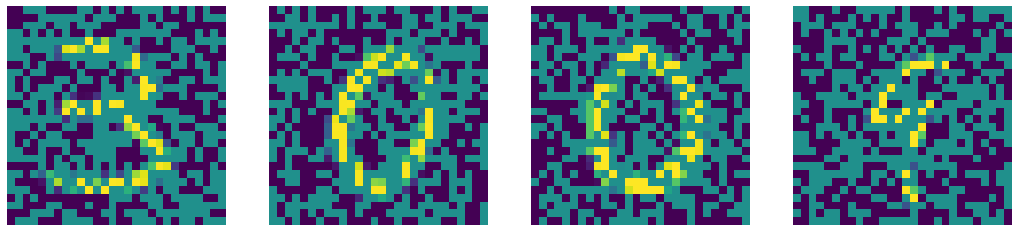

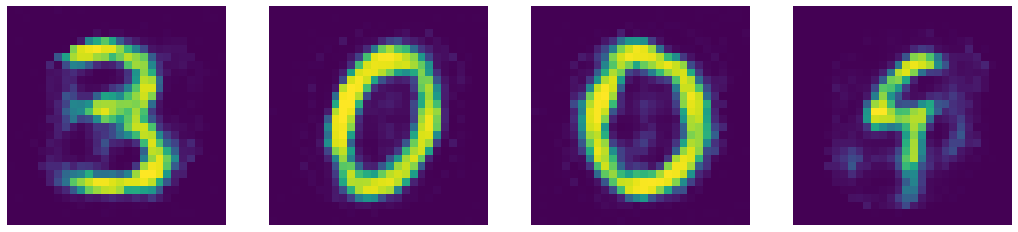

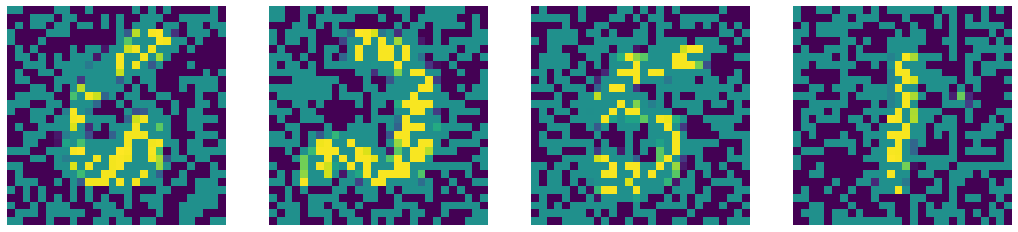

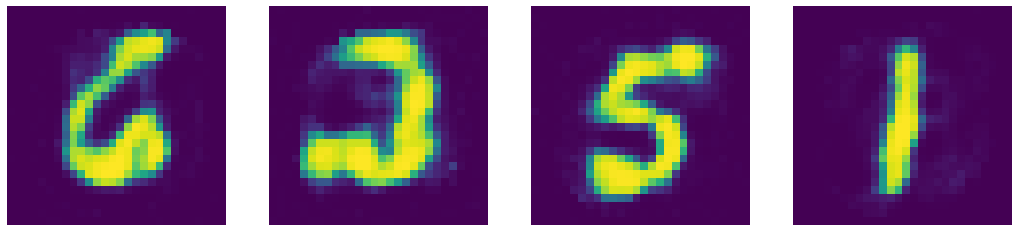

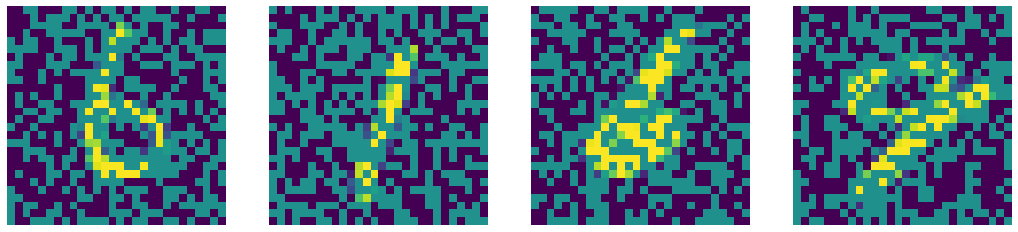

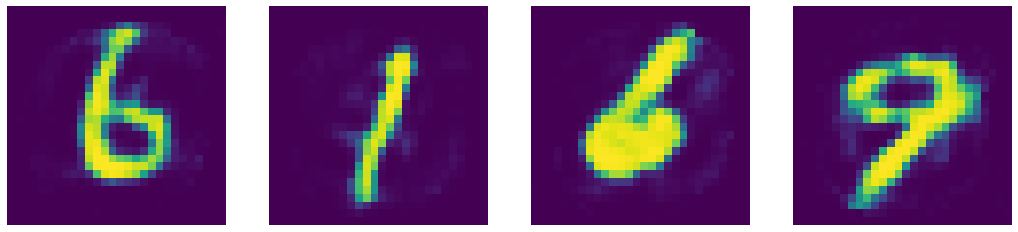

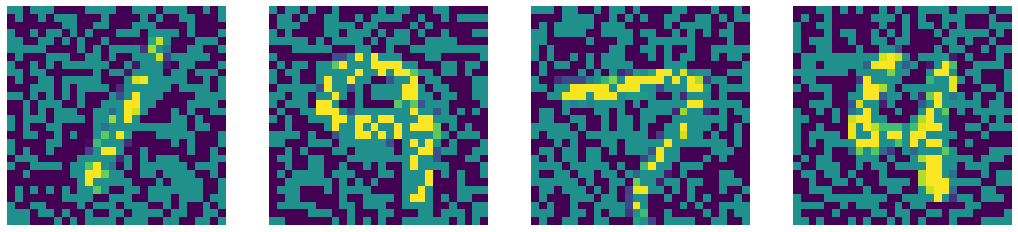

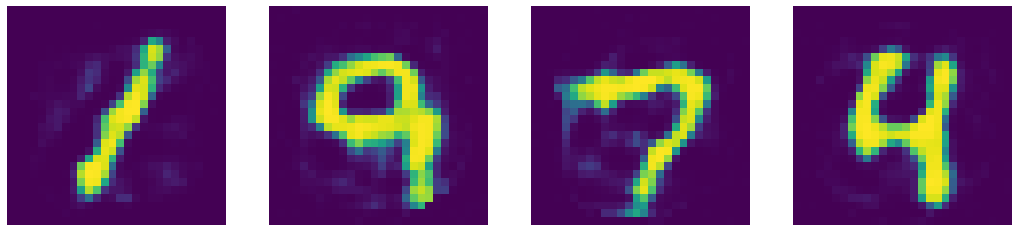

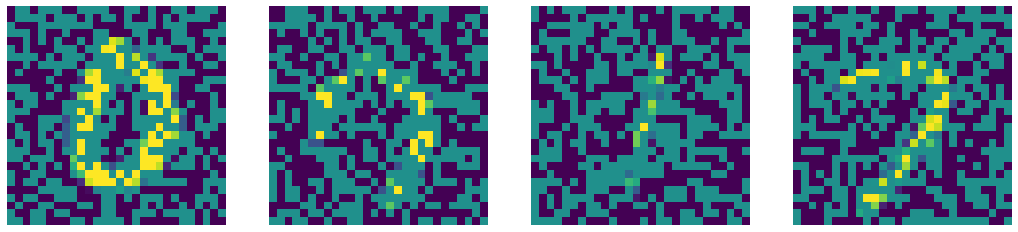

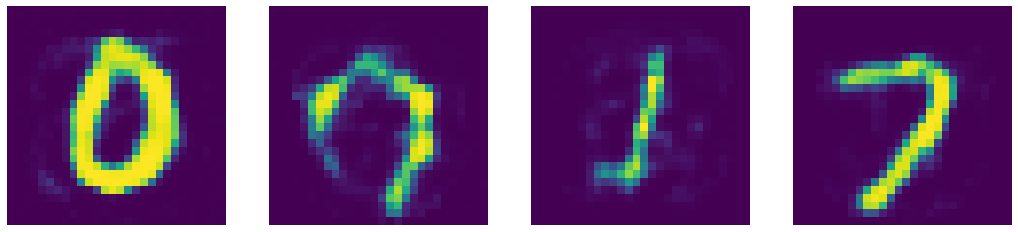

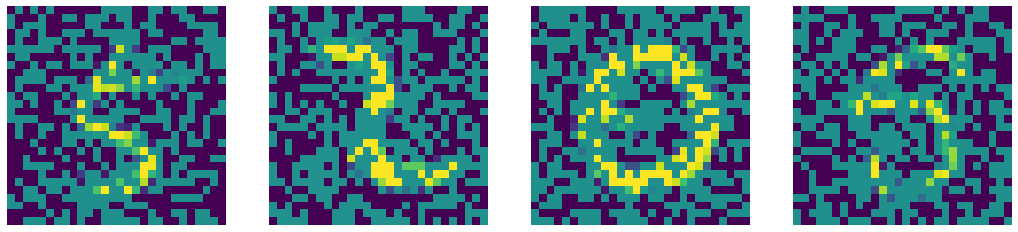

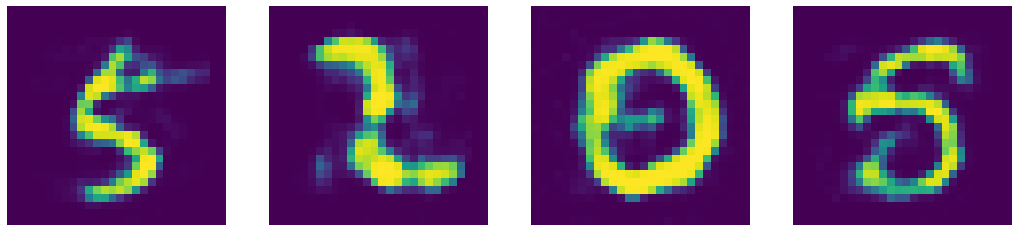

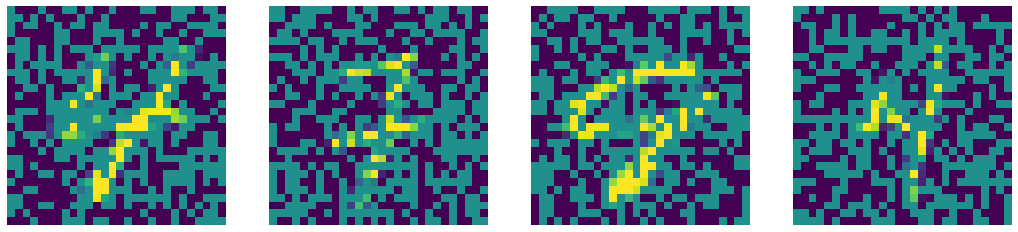

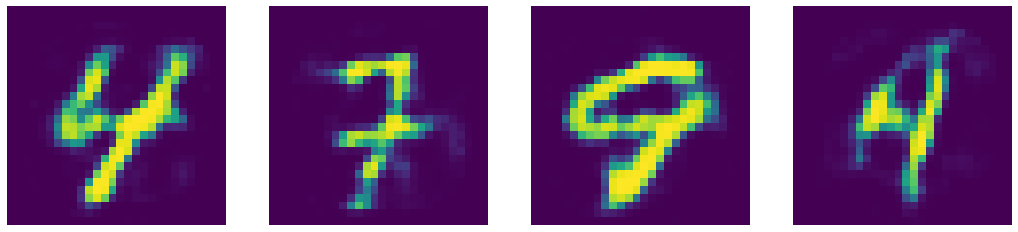

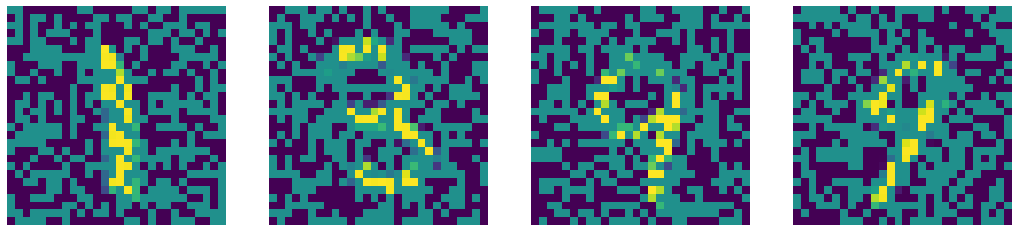

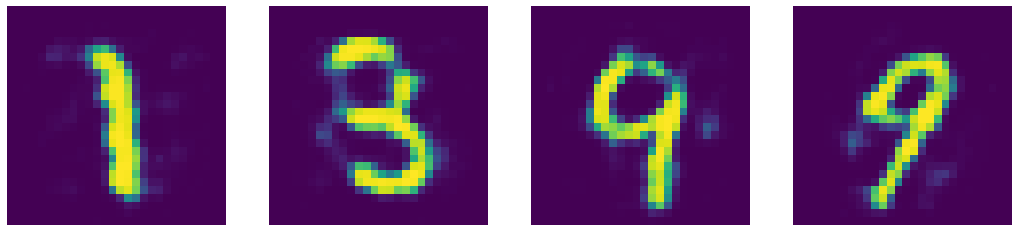

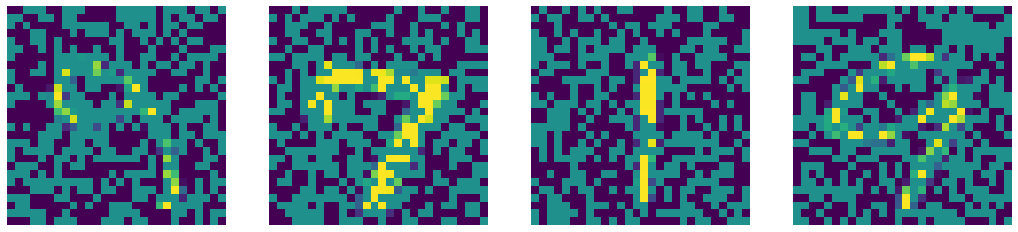

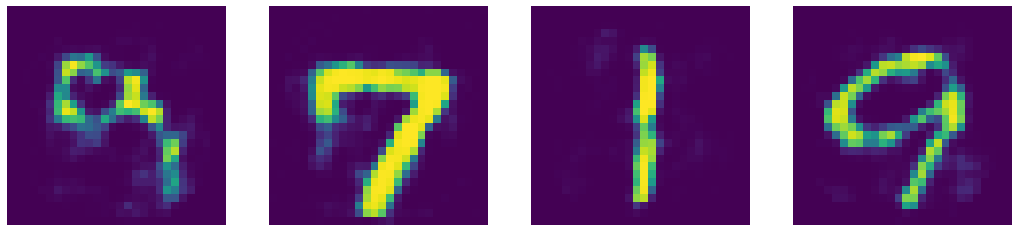

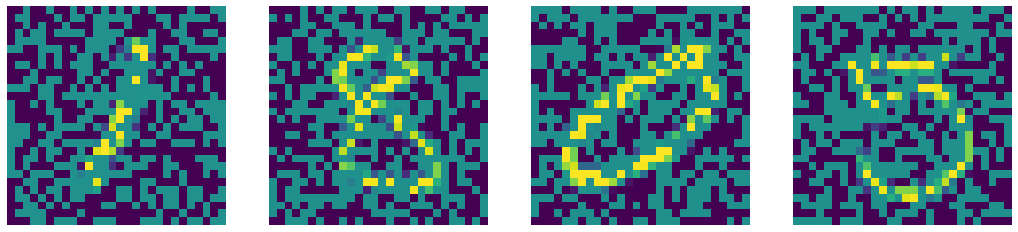

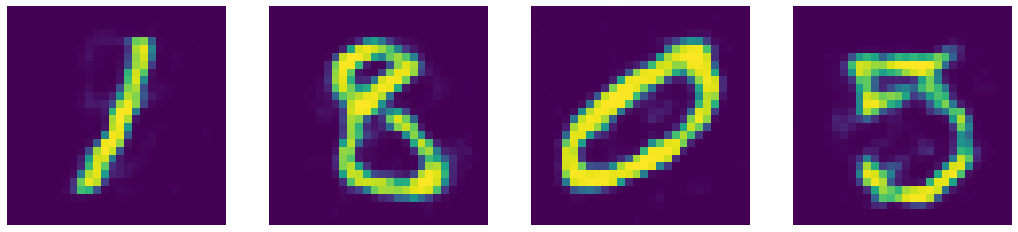

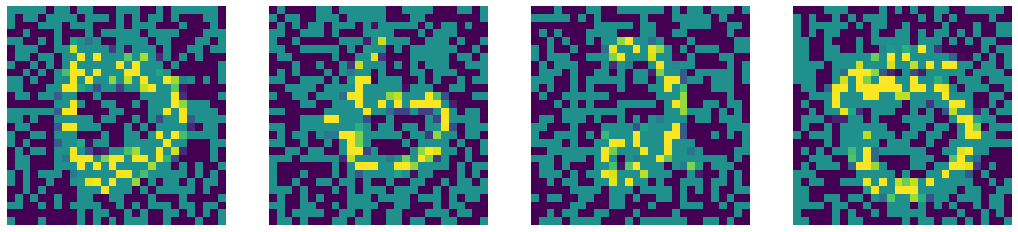

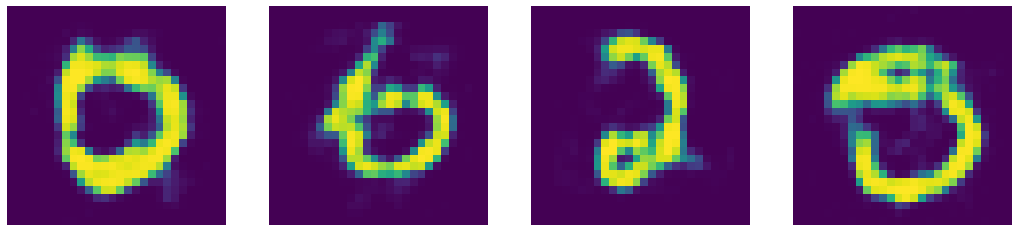

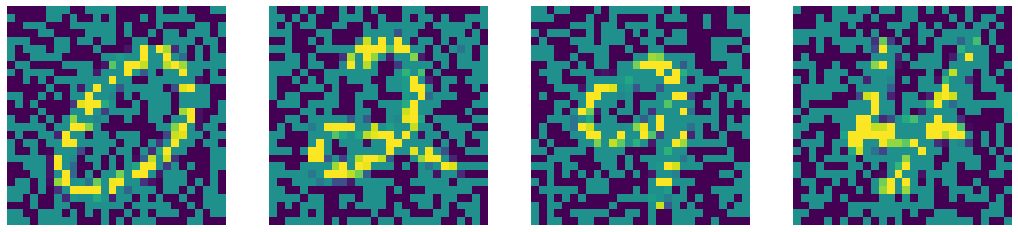

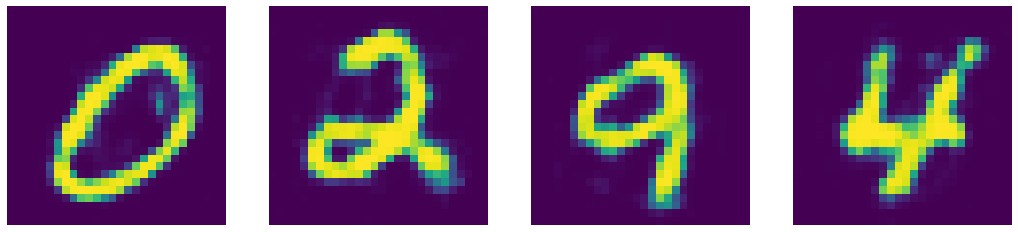

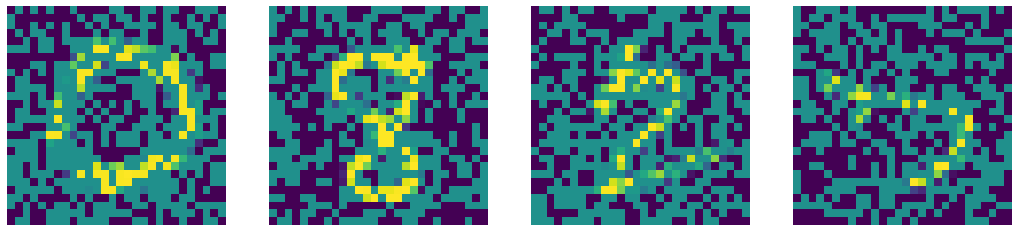

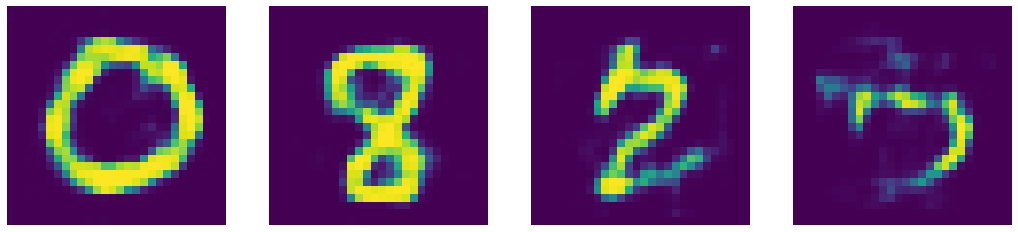

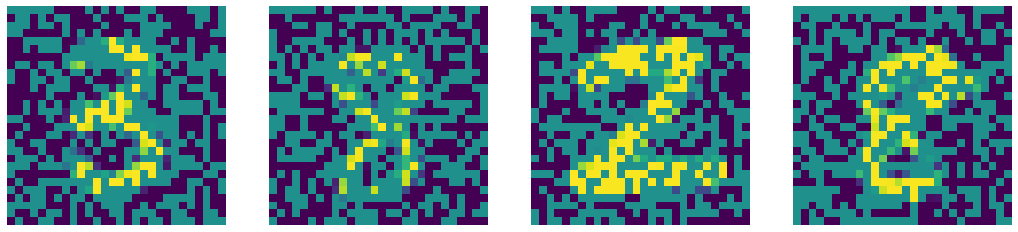

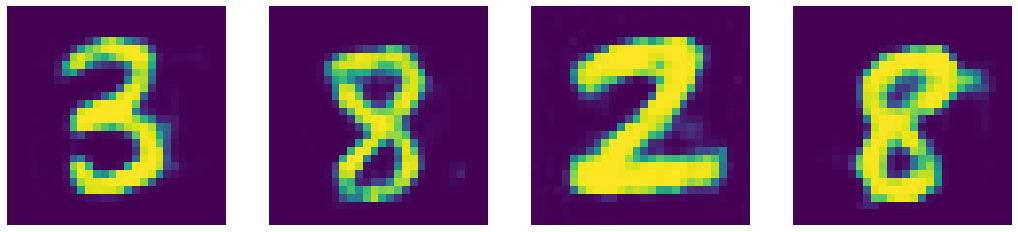

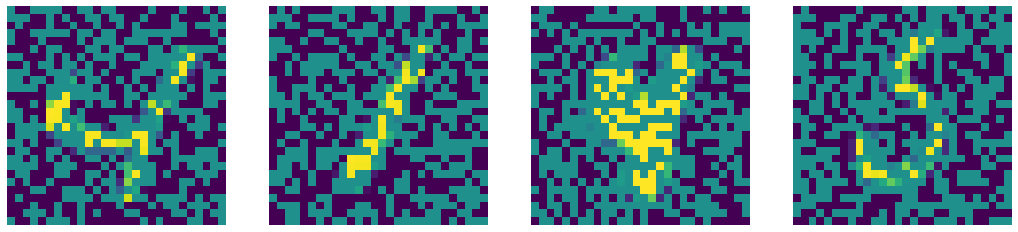

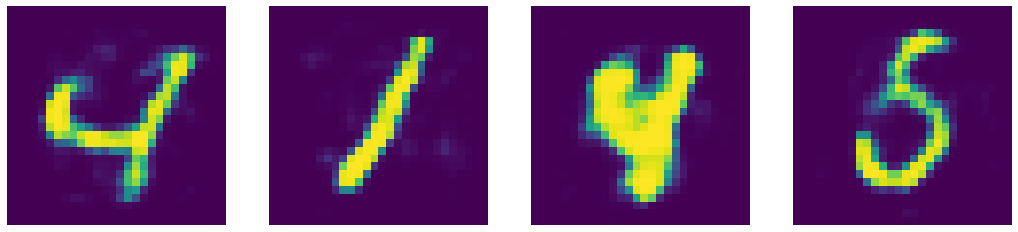

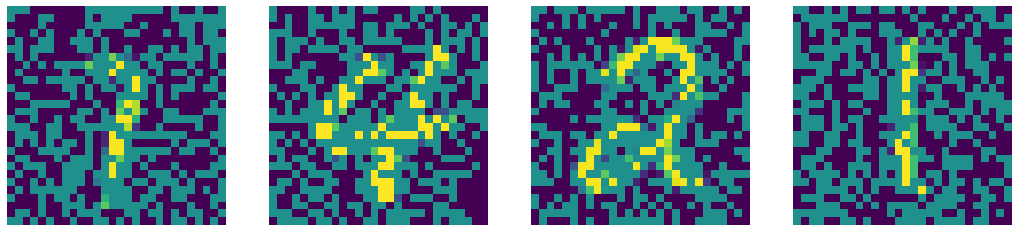

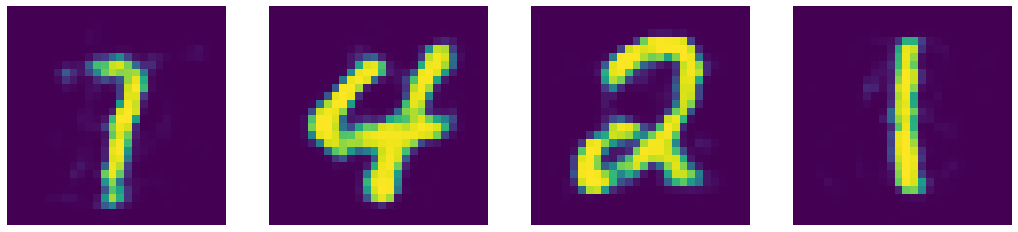

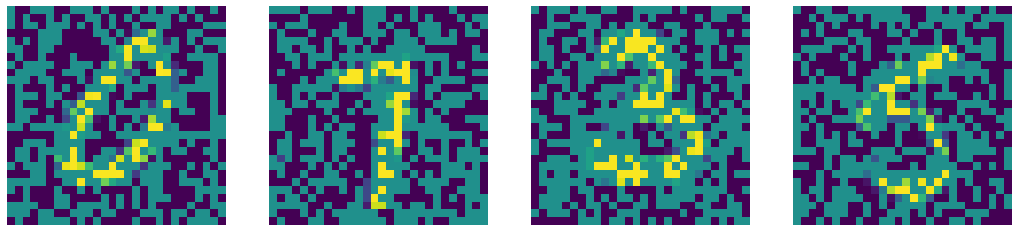

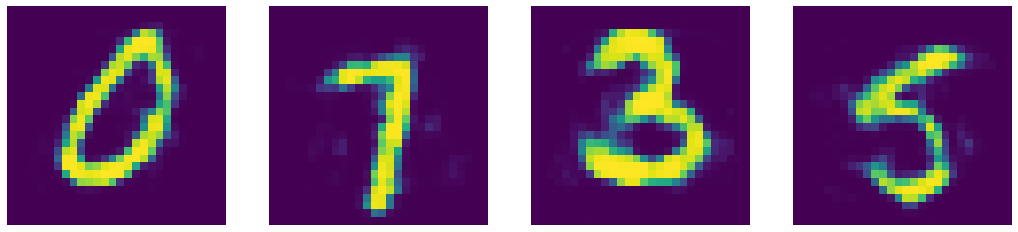

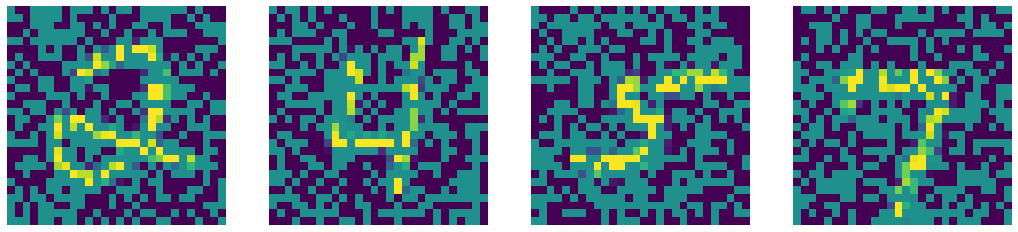

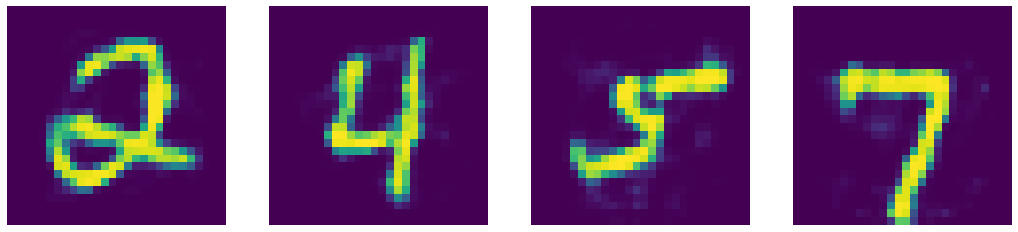

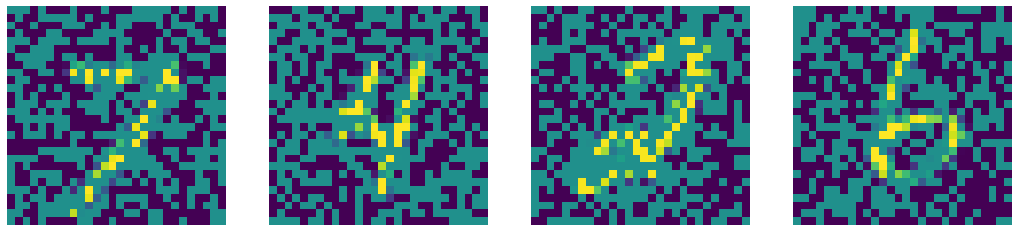

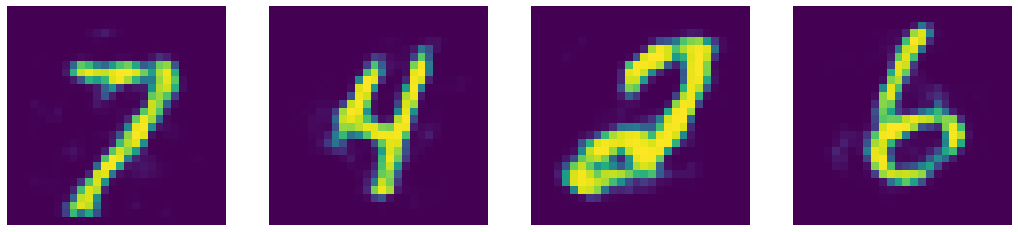

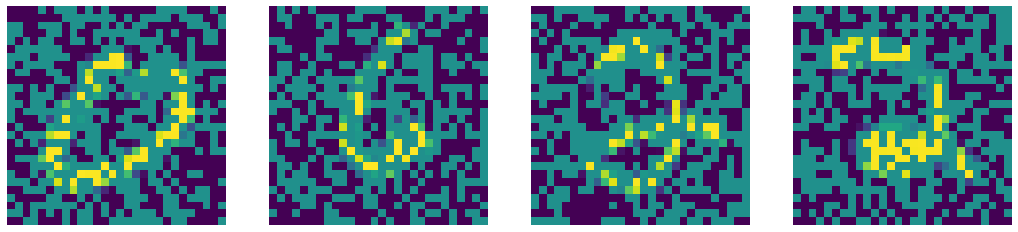

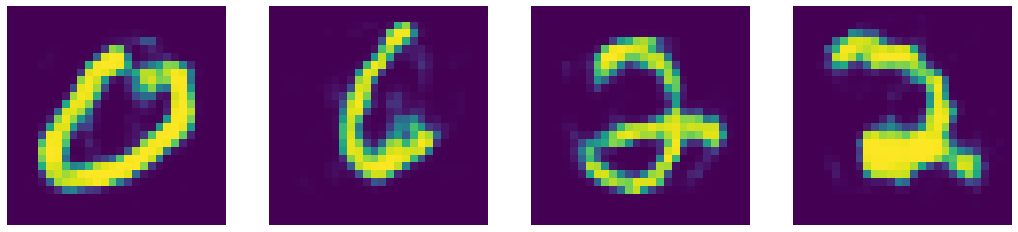

In [22]:
epochs = 20
dropout = nn.Dropout()

for epoch in range(epochs):
  for data in dataloader:
    img, label = data
    img = img.to(device)
    img = img.view(img.size(0), -1)
    noise = torch.ones(img.shape)
    noise = dropout(noise)
    noise = noise.to(device)
    img_noised = img * noise

    output = model(img_noised)
    loss = criterion(output, img.data)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  print("epochs: {}".format(epoch + 1))
  print("loss: ", loss.item())
  display_image(img_noised, output)

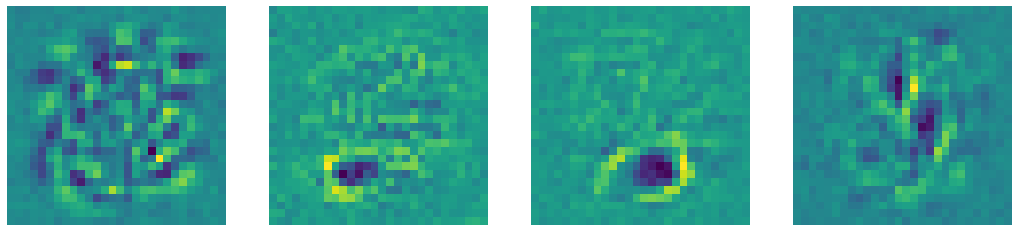

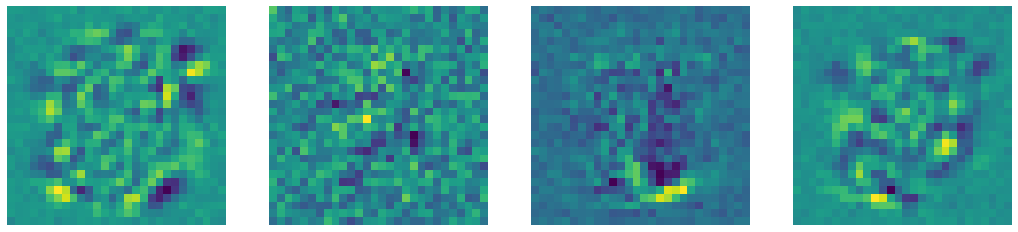

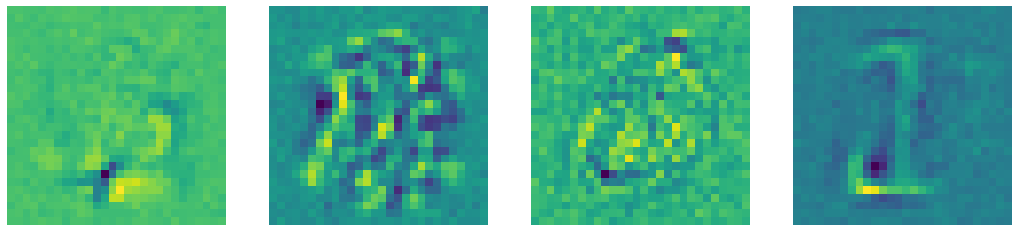

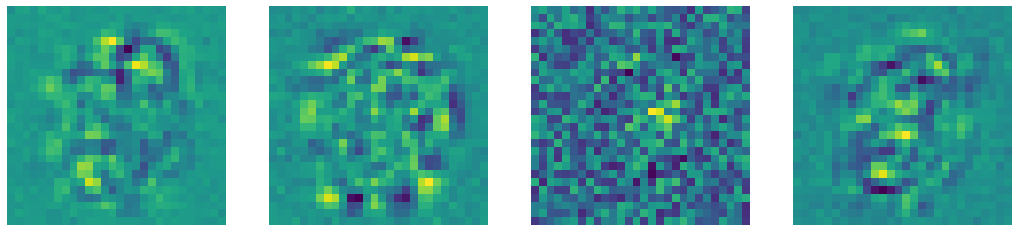

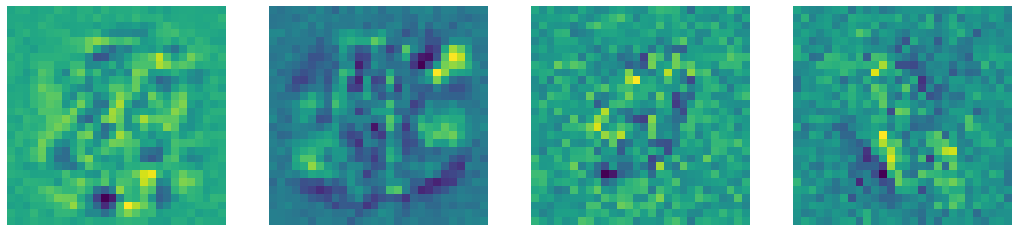

In [25]:
display_image(None, model.encoder[0].weight, 5)
#visualizing some of the encoder kernels

In [26]:
#Compare the inpainting
from cv2 import inpaint, INPAINT_NS, INPAINT_TELEA

In [27]:
# Inpaint with Telea and Navier-Stokes algos
#unpaint method is used in image restoration where blemihes are removed from an image, due to 

dst_TELEA = list()
dst_NS = list()

for i in range(3, 7):
    corrupted_img = ((img_noised.data.cpu()[i].view(28, 28) / 4 + 0.5) * 255).byte().numpy()
    mask = 2 - noise.cpu()[i].view(28, 28).byte().numpy()
    dst_TELEA.append(inpaint(corrupted_img, mask, 3, INPAINT_TELEA))  #inpaint radius is 3
    dst_NS.append(inpaint(corrupted_img, mask, 3, INPAINT_NS))
    dst_NS.append(inpaint()
tns_TELEA = [torch.from_numpy(d) for d in dst_TELEA]
tns_NS = [torch.from_numpy(d) for d in dst_NS]

TELEA = torch.stack(tns_TELEA).float()
NS = torch.stack(tns_NS).float()

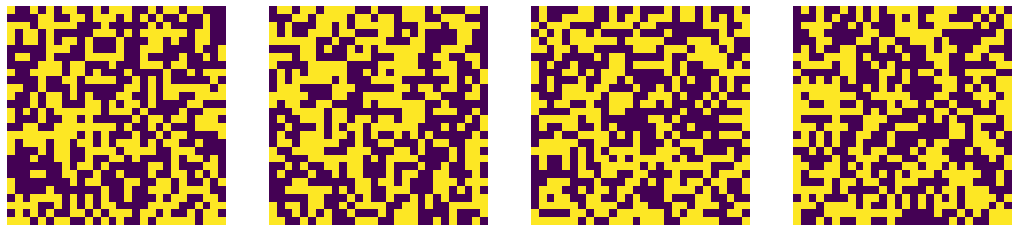

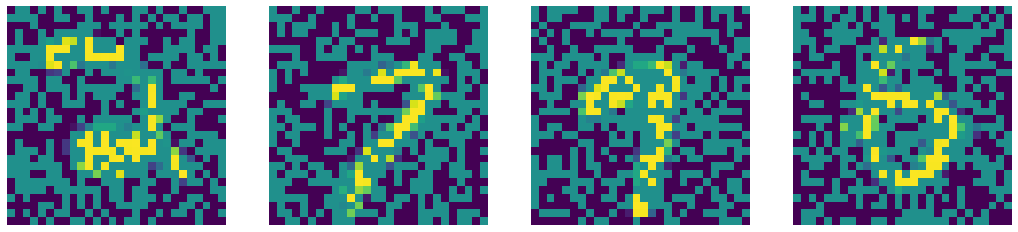

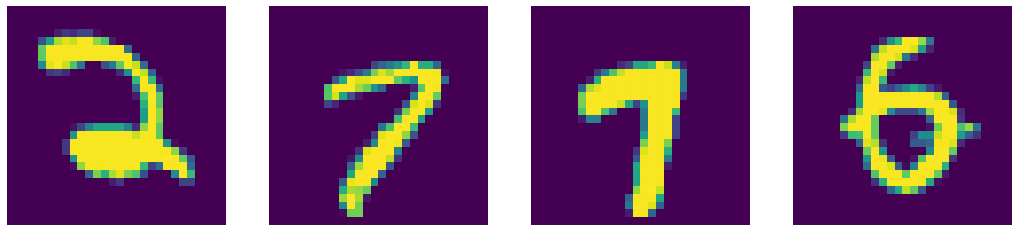

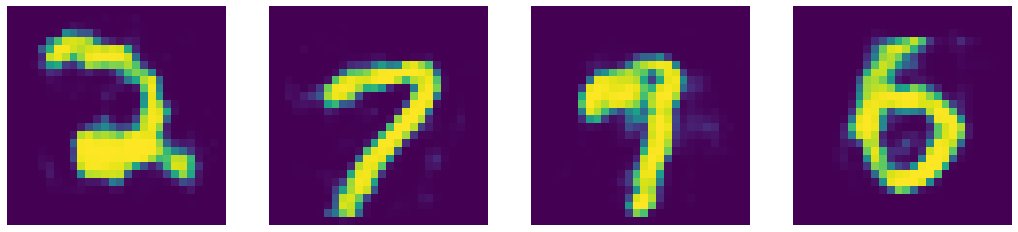

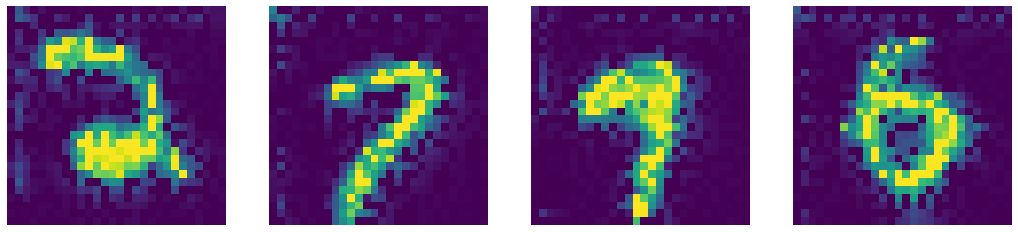

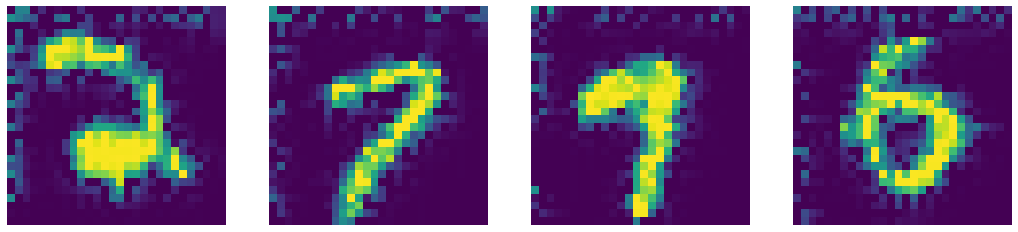

In [28]:
with torch.no_grad():
    display_images(noise[3:7], img_noised[3:7])
    display_images(img[3:7], output[3:7])
    display_images(TELEA, NS)

#comparing all results    